# AutoML for Images - Fire Detection - Calling CV model Fire Detection on Images

<img src="https://github.com/retkowsky/AutoMLforImages/blob/main/images/webcam.jpg?raw=true" width=600>

In [1]:
#!pip install bingmaps
#!pip install geocoder
#!pip install emoji

In [2]:
import azureml.core
from azureml.core import Workspace, Dataset
from azureml.core.webservice import Webservice
import requests
import json
import matplotlib.pyplot as plt 
import cv2
import os
import urllib
import time
import emoji
import bingmaps
from IPython.display import Image, display
import geocoder
from urllib.parse import quote
from datetime import date
import datetime
from datetime import datetime, timedelta
import uuid
from IPython.display import display_javascript, display_html

In [4]:
ws = Workspace.from_config()

## 1. AutoML for Images computer vision model to use

In [5]:
service = Webservice(workspace=ws, name='automlcv-firedetect')
#print(service.scoring_uri)
#print(service.swagger_uri)
primary, secondary = service.get_keys()
scoring_uri = service.scoring_uri
key = primary

## 2. Image to analyze

In [6]:
#image_url = 'https://github.com/retkowsky/AutoMLforImages/blob/main/images/testfire%20(1).jpg?raw=true'
#image_url = 'https://github.com/retkowsky/AutoMLforImages/blob/main/images/testfire%20(2).jpg?raw=true'
#image_url = 'https://github.com/retkowsky/AutoMLforImages/blob/main/images/testfire%20(3).jpg?raw=true'
image_url = 'https://github.com/retkowsky/AutoMLforImages/blob/main/images/testfire%20(4).jpg?raw=true'

Image information: tests/webcam.jpg  Height = 500 Width = 885


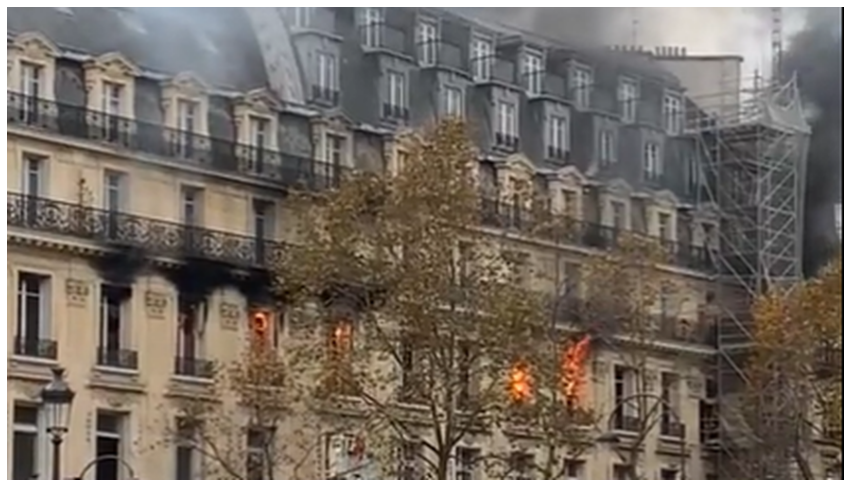

In [7]:
image_file = 'tests/webcam.jpg'
urllib.request.urlretrieve(image_url, filename=image_file) # Downloading the image

img = cv2.imread(image_file)
h, w, c = img.shape
print("Image information:", image_file, " Height =", h, "Width =", w)
plt.figure(figsize=(15,15)) 
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(image_rgb)

## 3. Computer Vision results

In [8]:
input_data = open(image_file, 'rb').read()
headers = {'Content-Type': 'application/json'}
headers['Authorization'] = f'Bearer {key}'
cvresp = requests.post(scoring_uri, input_data, headers=headers)

In [9]:
predictions = json.loads(cvresp.text) # Loading the predictions from the computer vision model    
probs = predictions['probs']
labels = predictions['labels']

print(predictions, '\n')

{'filename': '/tmp/tmppijn_6j0', 'probs': [0.8050602674484253, 0.1949397325515747], 'labels': ['Fire', 'Non-Fire']} 



In [10]:
if probs[0] >= probs[1]:
    max = 0
elif probs[0] < probs[1]:
    max = 1

if labels[max] == 'Fire':
    import emoji
    print(emoji.emojize(":fire:"), emoji.emojize(":fire:"), emoji.emojize(":fire:"),  
          'Computer vision model prediction:', labels[max], 'with confidence =', round(probs[max], 3))    

if labels[max] == 'Non-Fire':
    print('Computer vision model prediction:', labels[max], 'with confidence =', round(probs[max], 3))

🔥 🔥 🔥 Computer vision model prediction: Fire with confidence = 0.805


## 3. Geocoding with Bing

### Bing Map

In [11]:
print("https://www.bing.com/maps?osid=91979c1b-5ce7-4a51-bd9a-db8a1f165604&cp=48.861754~2.305874&lvl=14&v= \
2&sV=2&form=S00027")

https://www.bing.com/maps?osid=91979c1b-5ce7-4a51-bd9a-db8a1f165604&cp=48.861754~2.305874&lvl=14&v= 2&sV=2&form=S00027


### Bing Map with Traffic

In [12]:
print("https://www.bing.com/maps?osid=1a575ec7-3737-407d-9bc0-5c12aa82c095&cp=48.859467~2.31784&lvl=14&v= \
2&sV=2&form=S00027")

https://www.bing.com/maps?osid=1a575ec7-3737-407d-9bc0-5c12aa82c095&cp=48.859467~2.31784&lvl=14&v= 2&sV=2&form=S00027


In [13]:
# Loading the Bing Maps key from the BingMapsKey.py file to avoid clear exposition of keys
import BingMapsKey as BingMapsKeyFile
BingMapsKey = BingMapsKeyFile.BingMapsKey
#print(BingMapsKey)

### Fire Station address

In [14]:
FireStationAddress = "50 rue de babylone 75007 Paris, France"

g = geocoder.bing(FireStationAddress, key=BingMapsKey)
firestation_lat = g.json['lat']
firestation_lon = g.json['lng']
print("\033[1;31;34mFire Station address:", FireStationAddress)
print("Latitude:", firestation_lat, "Longitude:", firestation_lon)
zoomLevel = 15
map_firestation_url = f"https://www.bing.com/maps?cp={firestation_lat}~{firestation_lon}&lvl={zoomLevel}&sp=point.{firestation_lat}_{firestation_lon}"

Fire Station address: 50 rue de babylone 75007 Paris, France
Latitude: 48.85798263549805 Longitude: 2.315109968185425


In [15]:
print(map_firestation_url)

https://www.bing.com/maps?cp=48.85798263549805~2.315109968185425&lvl=15&sp=point.48.85798263549805_2.315109968185425


### Webcam location

In [16]:
WebCamAdress = "Place de l'opéra 75002 Paris, France"

g = geocoder.bing(WebCamAdress, key=BingMapsKey)
webcam_lat = g.json['lat']
webcam_lon = g.json['lng']
print("\033[1;31;34mWebcam address:", FireStationAddress)
print("Latitude:", webcam_lat, "Longitude:", webcam_lon)
zoomLevel = 15
map_webcam_url = f"https://www.bing.com/maps?cp={webcam_lat}~{webcam_lon}&lvl={zoomLevel}&sp=point.{webcam_lat}_{webcam_lon}"

Webcam address: 50 rue de babylone 75007 Paris, France
Latitude: 48.8705985500041 Longitude: 2.33253165005539


In [17]:
print(map_webcam_url)

https://www.bing.com/maps?cp=48.8705985500041~2.33253165005539&lvl=15&sp=point.48.8705985500041_2.33253165005539


## 4. Traffic prediction with Bing

In [18]:
bingrouteurl = 'http://dev.virtualearth.net/REST/V1/Routes?wp.0='
coord1 = str(webcam_lat) + ',' + str(webcam_lon)
coord2 = str(firestation_lat) + ',' + str(firestation_lon)
keyparam = '&key=' + str(BingMapsKey)
traffic_url_res = bingrouteurl + coord1 + '&wp.1=' + coord2 + keyparam
#traffic_url_res

In [19]:
# Calling the Traffic predictions
request = urllib.request.Request(traffic_url_res)
response_traffic = urllib.request.urlopen(request)
response_traffic_decode = response_traffic.read().decode(encoding="utf-8")
trafficresult = json.loads(response_traffic_decode)

In [20]:
class JSONviewer(object):

    def __init__(self, json_data):
        if isinstance(json_data, dict):
            self.json_str = json.dumps(json_data)
        else:
            self.json_str = json
        self.uuid = str(uuid.uuid4())
        
    def _ipython_display_(self):
        display_html('<div id="{}" style="height: 600px; width:100%;"></div>'.format(self.uuid),
            raw=True
        )
        display_javascript("""
        require(["https://rawgit.com/caldwell/renderjson/master/renderjson.js"], function() {
          renderjson.set_show_to_level(1)
          document.getElementById('%s').appendChild(renderjson(%s))
        });
        """ % (self.uuid, self.json_str), raw=True)

In [21]:
JSONviewer(trafficresult)

### Results

In [22]:
TravelDistance = trafficresult["resourceSets"][0]["resources"][0]["routeLegs"][0]["travelDistance"]
TravelDurationMin = round(trafficresult["resourceSets"][0]["resources"][0]["routeLegs"][0]["travelDuration"] / 60, 2)
TravelDurationTrafficMin = round(trafficresult["resourceSets"][0]["resources"][0]['travelDurationTraffic'] / 60, 2)
TravelDiffTraffic = round(TravelDurationTrafficMin - TravelDurationMin, 2)
TravelDiffTrafficPct = int(((TravelDurationTrafficMin / TravelDurationMin) - 1) * 100)
CurrentDT = datetime.now() + timedelta(minutes=60)
EstArrivalTime = CurrentDT + timedelta(minutes=TravelDurationMin)
print("\033[1;31;34mFire Address:", WebCamAdress,'\n')
print("Travel Distance in km =", TravelDistance)
print("Travel Mode:", trafficresult["resourceSets"][0]["resources"][0]["routeLegs"][0]["travelMode"])
print("Traffic Congestion:", trafficresult["resourceSets"][0]["resources"][0]['trafficCongestion'])

print("Travel Duration (without traffic) =", TravelDurationMin, 'Min')
print("Travel Duration (with traffic) =", TravelDurationTrafficMin, 'Min')
print()
print("Current date:", CurrentDT )
print("Estimated Arrival Time:", EstArrivalTime)
print()
TravelDiffTraffic = int(TravelDiffTraffic)
print("\033[1;31;91m>> Additional travel time due to Traffic :", "+", TravelDiffTraffic\
      , "min (+", TravelDiffTrafficPct, "%)")

Fire Address: Place de l'opéra 75002 Paris, France 

Travel Distance in km = 2.776
Travel Mode: Driving
Traffic Congestion: Heavy
Travel Duration (without traffic) = 10.85 Min
Travel Duration (with traffic) = 18.67 Min

Current date: 2021-12-14 18:45:18.014235
Estimated Arrival Time: 2021-12-14 18:56:09.014235

>> Additional travel time due to Traffic : + 7 min (+ 72 %)


### Directions from the fire station to the fire incident place

In [23]:
encodedDest = urllib.parse.quote(WebCamAdress, safe='')

routeUrl = "http://dev.virtualearth.net/REST/V1/Routes/Driving?wp.0=" \
+ str(firestation_lat) + "," + str(firestation_lon) + "&wp.1=" + encodedDest + "&key=" + BingMapsKey
request = urllib.request.Request(routeUrl)
response = urllib.request.urlopen(request)
r = response.read().decode(encoding="utf-8")
result = json.loads(r)
itineraryItems = result["resourceSets"][0]["resources"][0]["routeLegs"][0]["itineraryItems"]

print("Directions from the firestation to the fire incident place:\n")
i = 1
travel_distance = 0
instruction_list = []

for item in itineraryItems:
    print("\033[1;31;34m Step", i, ":", item["instruction"]["text"], "| Distance (km) =", item["travelDistance"])
    travel_distance = travel_distance + item["travelDistance"]
    i+=1
    instruction_list.append(item["instruction"]["text"])

Directions from the firestation to the fire incident place:

 Step 1 : Head northwest on Rue de Grenelle toward Rue de Constantine | Distance (km) = 0.162
 Step 2 : At the roundabout, take the 1st exit for Avenue du Maréchal Gallieni | Distance (km) = 0.483
 Step 3 : Turn right onto Quai d'Orsay | Distance (km) = 0.412
 Step 4 : Turn left onto Pont de la Concorde | Distance (km) = 0.154
 Step 5 : Keep straight to get onto Place de la Concorde | Distance (km) = 0.358
 Step 6 : Keep straight to get onto Rue Royale | Distance (km) = 0.322
 Step 7 : Keep straight to get onto Place de la Madeleine | Distance (km) = 0.073
 Step 8 : Keep straight to get onto Boulevard de la Madeleine | Distance (km) = 0.233
 Step 9 : Road name changes to Boulevard des Capucines | Distance (km) = 0.34
 Step 10 : Arrive at Place de l'opéra, 75002 Paris, France | Distance (km) = 0


### Bing Map

In [24]:
bingmap_link = "https://www.bing.com/maps?osid=3b0f8407-f3b7-4561-a262-b33808a8b9cf&cp=48.862071~2.315415\
&lvl=15&v=2&sV=2&form=S00027"
print(bingmap_link)

https://www.bing.com/maps?osid=3b0f8407-f3b7-4561-a262-b33808a8b9cf&cp=48.862071~2.315415&lvl=15&v=2&sV=2&form=S00027


### Get Azure Maps Current Weather Conditions

In [25]:
# Loading the Azure Maps key
import AzureMapsKey as AzureMapsKeyFile
AzureMapsKey = AzureMapsKeyFile.AzureMapsKey
#print(AzureMapsKey)

In [26]:
bingweatherurlbase = 'https://atlas.microsoft.com/weather/currentConditions/json?api-version=1.0&query='
coord = str(webcam_lat) + ',' + str(webcam_lon)
keyparam = '&subscription-key=' + str(AzureMapsKey)
WeatherBingUrl = bingweatherurlbase + coord + keyparam
#WeatherBingUrl

In [27]:
WeatherBing = urllib.request.urlopen(WeatherBingUrl)
WeatherBing_decode = WeatherBing.read().decode(encoding="utf-8")
Weather = json.loads(WeatherBing_decode)

In [28]:
JSONviewer(Weather)

In [29]:
dtweather = Weather["results"][0]['dateTime']
phrase = Weather["results"][0]['phrase']
hasPrecipitation = Weather["results"][0]['hasPrecipitation']
isDayTime = Weather["results"][0]['isDayTime']
temperature = Weather["results"][0]['temperature']['value']
relativeHumidity = Weather["results"][0]['relativeHumidity']

if isDayTime == True:
    isDayTime = "This is the day"

if isDayTime == False:
    isDayTime = "This is the night"

if hasPrecipitation == True:
    hasPrecipitation = "It is raining"

if hasPrecipitation == False:
    hasPrecipitation = "No rain"

temperatureF = round(temperature * 9/5 + 32, 2)
    
print("\033[1;31;34mAzure Maps Weather forecast at:", coord)
print("\n- Weather Phrase :", phrase)
print("- Precipitation :", hasPrecipitation)
print("- DayTime :", isDayTime, "(", dtweather, ")")
print("- Temperature =", temperature, '°C or', temperatureF, '°F')
print("- Relative Humidity =", relativeHumidity, '%')

Azure Maps Weather forecast at: 48.8705985500041,2.33253165005539

- Weather Phrase : Cloudy
- Precipitation : No rain
- DayTime : This is the night ( 2021-12-14T18:42:00+01:00 )
- Temperature = 6.5 °C or 43.7 °F
- Relative Humidity = 93 %


> End